In [170]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [171]:
data = pd.read_csv("cars.csv")

In [172]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [173]:

# number of unique values ​​in the column "Seller_Type"
data.Seller_Type.value_counts()


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [174]:

# number of unique values ​​in the column "Fuel_Type"
data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [175]:
# number of unique values ​​in the column "Transmission"
data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [176]:

# in those columns with only two unique values, we convert the data to zeros and ones
data['Seller_Type'] = data['Seller_Type'].apply(lambda x: 1 if x == 'Dealer' else 0)
data['Transmission'] = data['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)


In [177]:

# in those columns with three unique values, we convert the data into zeros and ones and twos using such method
data.replace({'Fuel_Type': {"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace=True)

In [178]:
# updated data output
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,1,0
1,sx4,2013,4.75,9.54,43000,1,1,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,1,1,0
4,swift,2014,4.60,6.87,42450,1,1,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,1,0
297,brio,2015,4.00,5.90,60000,0,1,1,0
298,city,2009,3.35,11.00,87934,0,1,1,0
299,city,2017,11.50,12.50,9000,1,1,1,0


<Axes: title={'center': 'Plot #1'}, xlabel='Year', ylabel='Selling_Price'>

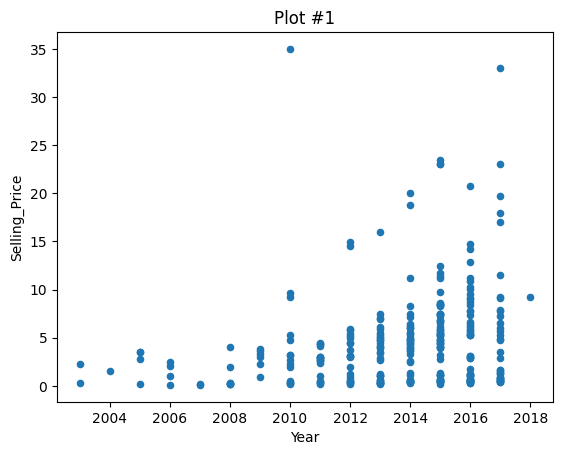

In [212]:
# corelation plotting between "Year" and 'Selling_Price' data
data.plot.scatter(x="Year", y = 'Selling_Price', title = "Plot #1")

In [179]:
# features (x) and labels (y) initialization
x = data.drop(["Car_Name", "Selling_Price"], axis=1)
y = data["Selling_Price"]

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [181]:
model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression()

In [182]:
model.score(x_test, y_test)

0.8468053957653994

In [207]:
param_grid = {
    'fit_intercept': [True, False], # (по умолчанию=True): Определяет, следует ли включать свободный член в модель (y = mx + b).
    'copy_X': [True, False], #(по умолчанию=True): Если установлено значение True, то X будет скопировано; в противном случае, оно может быть перезаписано.
    'n_jobs': [None, -1], # (по умолчанию=None): Определяет количество параллельных работающих процессов. Если None, то 1. Если -1, то используются все доступные ядра процессора.
    'positive': [True, False]
}


grid_search = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [208]:
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [209]:
model = grid_search.best_estimator_ 

In [210]:
model.score(x_test, y_test)

0.8954553871532264

In [211]:
# 1st method to output predictions
n = 5
predicted_value = x_test.iloc[[n]]
prediction = model.predict(predicted_value)
print(f"Predicted value: {prediction[0]}")
print(f"Actual value: {y_test.iloc[n]}")


Predicted value: 7.134199666453469
Actual value: 7.45


In [213]:
# predictions output in DataFrame format
pred = model.predict(x_test)
data_pred = pd.DataFrame({"Actuals": y_test.squeeze(), "Predictions": pred.squeeze()})
print(data_pred)

     Actuals  Predictions
177     0.35     1.461718
289    10.11     9.423922
228     4.95     5.498154
198     0.15     0.150000
60      6.95     9.605745
..       ...          ...
234     5.50     5.274417
296     9.50     9.270616
281     2.10     0.929720
285     7.40     7.409382
182     0.30    -0.696924

[61 rows x 2 columns]


In [214]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)



# Calculate root mean square error (RMSE) and root mean absolute error (RMAE).
r_mse = np.sqrt(mse)
r_mae = np.sqrt(mae)

print(mae)
print(mse)


print(r_mae)
print(r_mse)

# The closer the MAE, MSE, RMSE and RMAE values ​​are to zero, the better the model.
# In this case, the model seems to do a good job of predicting
# because the error values ​​are small.

1.154480340197957
2.4082462653728753
1.0744674681896875
1.551852526940906
